In [5]:
import numpy as np
import torch

import matplotlib.pyplot as plt
import pandas as pd

from train import TrainerDAGMM
from test import eval
from preprocess import get_KDDCup99

In [6]:
class Args:
    num_epochs=200
    patience=50
    lr=1e-4
    lr_milestones=[50]
    batch_size=1024
    latent_dim=1
    n_gmm=4
    lambda_energy=0.1
    lambda_cov=0.005
    

    
args = Args()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = get_KDDCup99(args)

dagmm = TrainerDAGMM(args, data, device)
dagmm.train()

198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 0, Loss: 48169955.835
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 1, Loss: 48195066.619
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 2, Loss: 48174311.856
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 3, Loss: 48175045.505
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 4, Loss: 48174670.515
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 5, Loss: 48158751.835
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 6, Loss: 48171960.495
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 7, Loss: 48173975.299
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 8, Loss: 48173625.897
198371/198371: [============

In [7]:
from test import eval

labels, scores = eval(dagmm.model, data, device, args.n_gmm)

Testing...
Precision : 0.9469, Recall : 0.9140, F-score : 0.9302
ROC AUC score: 99.13


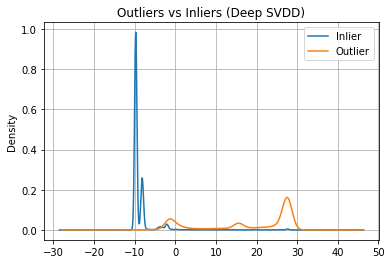

In [8]:
scores_in = scores[np.where(labels==0)[0]]
scores_out = scores[np.where(labels==1)[0]]


in_ = pd.DataFrame(scores_in, columns=['Inlier'])
out_ = pd.DataFrame(scores_out, columns=['Outlier'])


fig, ax = plt.subplots()
in_.plot.kde(ax=ax, legend=True, title='Outliers vs Inliers (Deep SVDD)')
out_.plot.kde(ax=ax, legend=True)
ax.grid(axis='x')
ax.grid(axis='y')
plt.show()